In [2]:
# Perform imports and load the dataset:
import pandas as pd 

# Load the dataset
df = pd.read_csv("Processed_Reviews (2).csv", encoding="ISO-8859-1") 


In [4]:
# Display the shape of the dataset
print(df.shape)

# Display the first 5 rows
print(df.head())

# Show DataFrame info
df.info()

# Checking for null values
print(df.isnull().sum())
 

(13, 14)
                                              Review  \
0  The product arrived on time. Packaging was gre...   
1           THIS PRODUCT IS JUST AMAZING! I LOVE IT.   
2  I bought this phone for $799, and it has a 120...   
3  Wow!!! This product is awesome... but a bit ex...   
4                The laptop works perfectly fine.      

                                          lowercased  \
0  the product arrived on time. packaging was gre...   
1           this product is just amazing! i love it.   
2  i bought this phone for $799, and it has a 120...   
3  wow!!! this product is awesome... but a bit ex...   
4                the laptop works perfectly fine.      

                                        urls_removed  \
0  the product arrived on time. packaging was gre...   
1           this product is just amazing! i love it.   
2  i bought this phone for $799, and it has a 120...   
3  wow!!! this product is awesome... but a bit ex...   
4                the laptop works per

In [6]:
positive_words = ['love', 'great', 'awesome', 'amazing', 'perfect', 'excellent', 'best', 'good', 'wonderful', 'worth']
negative_words = ['bad', 'worst', 'terrible', 'awful', 'poor', 'hate', 'expensive', 'problem', 'broken']

def label_review_text(review):
    review = review.lower()
    if any(word in review for word in positive_words):
        return "positive"
    elif any(word in review for word in negative_words):
        return "negative"
    else:
        return "neutral"  # or "unknown"
        
# Apply to the 'lemmatized' column
df['label'] = df['lemmatized'].apply(label_review_text)

# Display the labeled results
print(df[['Review', 'label']])

                                               Review     label
0   The product arrived on time. Packaging was gre...  positive
1            THIS PRODUCT IS JUST AMAZING! I LOVE IT.  positive
2   I bought this phone for $799, and it has a 120...  positive
3   Wow!!! This product is awesome... but a bit ex...  positive
4                 The laptop works perfectly fine.     positive
5   Check out the full product details here: https...   neutral
6   <div><h2>Great Purchase!</h2><p>I am happy wit...  positive
7   The battry life is excelent, but the chargin c...  positive
8   I can't believe it's so good! Didn't expect su...  positive
9   Love this product! ???? Fast delivery ??, amaz...  positive
10  TBH, I wasn't expecting much, but OMG, this is...  positive
11  This is the best product I have ever used in m...  positive
12  The shoes were comfortable, fitting nicely, an...  positive


In [8]:
# Save the updated DataFrame to a new CSV file
df.to_csv("Labeled_Reviews.csv", index=False)

In [24]:
# Load the labeled data
df = pd.read_csv("Labeled_Reviews.csv")

# Keep only the lemmatized text and label
df = df[['lemmatized', 'label']]

# Convert categorical labels to numeric (if needed)
label_map = {'positive': 1, 'negative': 0, 'neutral': -1}
df['label'] = df['label'].map(label_map)

# Check the results
print(df.head())

                                          lemmatized  label
0  product arrive time packaging great quality am...      1
1                                 product amaze love      1
2                 buy phone hz display totally worth      1
3                  wow product awesome bit expensive      1
4                         laptop work perfectly fine      1


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF vectorizer instance
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the 'lemmatized' text column
X_tfidf = tfidf_vectorizer.fit_transform(df['lemmatized'])

# Check the shape of the result
print("TF-IDF matrix shape:", X_tfidf.shape)

TF-IDF matrix shape: (13, 53)


In [32]:
# Get the feature names (words)
feature_names = tfidf_vectorizer.get_feature_names_out()

# View the first 10 features
print(feature_names[:10])

# Convert the sparse matrix to a dense format and wrap it in a DataFrame
import pandas as pd
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=feature_names)

# View the first few rows
print(tfidf_df.head())


['amaze' 'amazing' 'arrive' 'awesome' 'battery' 'believe' 'best' 'bit'
 'buy' 'cable']
     amaze   amazing    arrive   awesome  battery  believe  best      bit  \
0  0.00000  0.372748  0.432241  0.000000      0.0      0.0   0.0  0.00000   
1  0.70291  0.000000  0.000000  0.000000      0.0      0.0   0.0  0.00000   
2  0.00000  0.000000  0.000000  0.000000      0.0      0.0   0.0  0.00000   
3  0.00000  0.000000  0.000000  0.429896      0.0      0.0   0.0  0.49851   
4  0.00000  0.000000  0.000000  0.000000      0.0      0.0   0.0  0.00000   

        buy  cable  ...  purchase   quality  shoe  short      time   totally  \
0  0.000000    0.0  ...       0.0  0.330538   0.0    0.0  0.432241  0.000000   
1  0.000000    0.0  ...       0.0  0.000000   0.0    0.0  0.000000  0.000000   
2  0.408248    0.0  ...       0.0  0.000000   0.0    0.0  0.000000  0.408248   
3  0.000000    0.0  ...       0.0  0.000000   0.0    0.0  0.000000  0.000000   
4  0.000000    0.0  ...       0.0  0.000000   0.0 

In [42]:
print(df.columns)

Index(['lemmatized', 'label'], dtype='object')


In [44]:
import re 
import string 
import nltk 
from nltk.corpus import stopwords 

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Prepare stop words
stop_words = stopwords.words('english') 
more_stopwords = ['u', 'im', 'c'] 
stop_words = stop_words + more_stopwords 

# Initialize the stemmer
stemmer = nltk.SnowballStemmer("english") 

# Preprocessing function
def preprocess(text): 
    text = text.lower()  # Convert text to lowercase 
    text = re.sub(r'\[.*?\]', '', text)  # Remove text within square brackets 
    text = re.sub(r'http\S+\s*\S+', '', text)  # Remove URLs starting with http 
    text = re.sub(r'www\.\S+', '', text)  # Remove URLs starting with www 
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags 
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation 
    text = re.sub(r'\b\w*\d\w*\b', '', text)  # Remove words containing numbers 
    text = ' '.join(word for word in text.split() if word not in stop_words)  # Remove stopwords 
    text = ' '.join(stemmer.stem(word) for word in text.split())  # Stemming
    return text

# Apply the preprocessing function to 'lemmatized' column
df['message_clean'] = df['lemmatized'].apply(preprocess)

# Display first 20 rows
print(df.head(20))

# Print a specific cleaned message (row 304 for example)
print(df['message_clean'][304]) 


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tiemi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                           lemmatized  label  \
0   product arrive time packaging great quality am...      1   
1                                  product amaze love      1   
2                  buy phone hz display totally worth      1   
3                   wow product awesome bit expensive      1   
4                          laptop work perfectly fine      1   
5                           check full product detail     -1   
6                        great purchase happy product      1   
7           battery life excellent charge cable short      1   
8                 can not believe good expect quality      1   
9          love product fast delivery amazing quality      1   
10                  honest expect much oh god awesome      1   
11                         best product ever use life      1   
12     shoe comfortable fit nicely work perfectly jog      1   

                                   message_clean  
0   product arriv time packag great qualiti amaz  
1

KeyError: 304

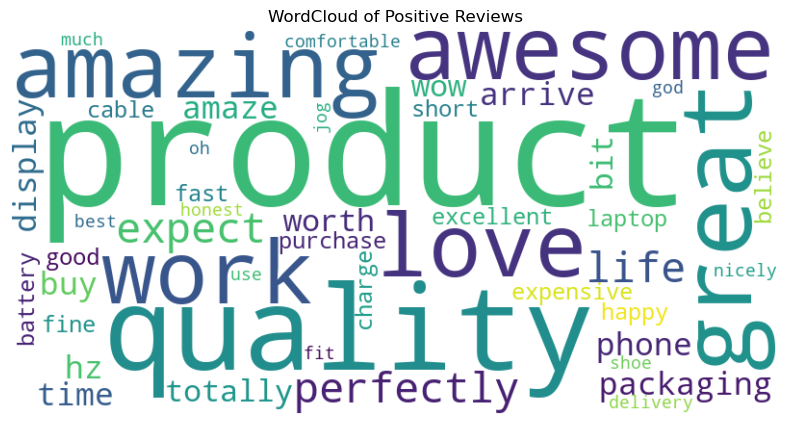

In [48]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter reviews labeled as positive
positive_reviews = df[df['label'] == 1]

# Combine all positive lemmatized reviews into a single string
positive_text = " ".join(positive_reviews['lemmatized'])

# Create the WordCloud
positive_wc = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Plot it
plt.figure(figsize=(10, 5))
plt.imshow(positive_wc, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud of Positive Reviews")
plt.show()

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer 
tfidf_vect = TfidfVectorizer() 
 
X = tfidf_vect.fit_transform(df['message_clean']) 
y = df['label']

In [56]:
from sklearn.naive_bayes import MultinomialNB 
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split 
 
# Split data into train & test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 
 
# Naive Bayes 
nb_clf = MultinomialNB().fit(X_train, y_train) 
 
# SVM 
svm_clf = SVC(kernel='linear').fit(X_train, y_train) 

In [58]:
# Performance metrics comparison 
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import accuracy_score  # Importing accuracy_score 
 
# Naive Bayes 
nb_predicted = nb_clf.predict(X_test) 
nb_report = classification_report(y_test, nb_predicted) 
# Calculate error rate for Naive Bayes 
nb_error_rate = 1 - accuracy_score(y_test, nb_predicted) 
nb_cm = confusion_matrix(y_test, nb_predicted) 
 
# SVM 
svm_predicted = svm_clf.predict(X_test) 
svm_report = classification_report(y_test, svm_predicted) 
# Calculate error rate for SVM 
svm_error_rate = 1 - accuracy_score(y_test, svm_predicted) 
svm_cm = confusion_matrix(y_test, svm_predicted)
nb_cm

C:\Users\tiemi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
C:\Users\tiemi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


array([[4]], dtype=int64)

In [64]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Predict
y_pred_svm = svm_model.predict(X_test)

# Evaluate
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))


SVM Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

Accuracy: 1.0


In [66]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Labels (already converted to numeric)
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predict on test data
y_pred_nb = nb_model.predict(X_test)

# Evaluate
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))
print("Accuracy:", accuracy_score(y_test, y_pred_nb))


Naive Bayes Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

Accuracy: 1.0


In [39]:
print("Naive Bayes Classifier Report:") 
print(nb_report) 
print(f"\nNaive Bayes Error Rate: {nb_error_rate:.2f}") 

Naive Bayes Classifier Report:
              precision    recall  f1-score   support

         ham       0.95      1.00      0.97      1107
        spam       1.00      0.67      0.80       186

    accuracy                           0.95      1293
   macro avg       0.97      0.83      0.89      1293
weighted avg       0.95      0.95      0.95      1293


Naive Bayes Error Rate: 0.05
